<a href="https://colab.research.google.com/github/Angelthebestone/Practicando-Python-para-Data-Science-Challenge-Alura-Store/blob/main/Practicando_Python_para_Data_Science_Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESAFIO ALURA LATAM PARTE 1 PROGRAMCIÓN

##EXTRACCIÓN DE DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##EXPLORACIÓN CONJUNTO DE DATOS

In [2]:
#para evitar confunción en las dos ultimas columnas de latitud y longitud, se renombran

tiendas = [tienda1, tienda2, tienda3, tienda4]
for tienda in tiendas:
  tienda.rename(columns={'lat': 'Latitud', 'lon': 'Longitud'}, inplace=True)



In [3]:
tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  Latitud                 2359 non-null   float64
 11  Longitud                2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [4]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


##INGRESO TOTAL POR CADA TIENDA

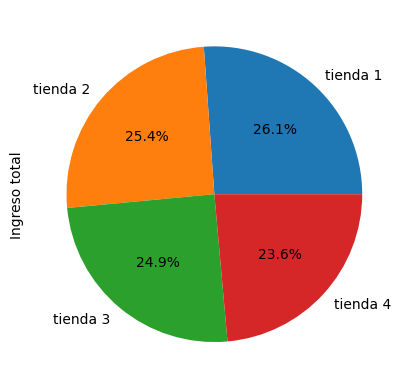

In [15]:
#Se procede a crear una compresión de lista la cual se encarga de recorrer la lista de tiendas y sumar todas las filas de precio en cada lista
ingresos_totales = [(f"tienda {i+1}",tienda['Precio'].sum()) for i, tienda in enumerate(tiendas)]
#después se procede a crear y guardar el data frame en orden descendente indicando cuál es la tienda con la mayor cantidad de ventas
df_Ingresos = pd.DataFrame(ingresos_totales, columns = ['Tienda', 'Ingreso total']).sort_values(by='Ingreso total', ascending=False).set_index('Tienda')

grafico_ingresos = df_Ingresos.plot(kind='pie',
                 y='Ingreso total',
                 x='Tienda',
                 autopct='%1.1f%%',
                 legend=None)



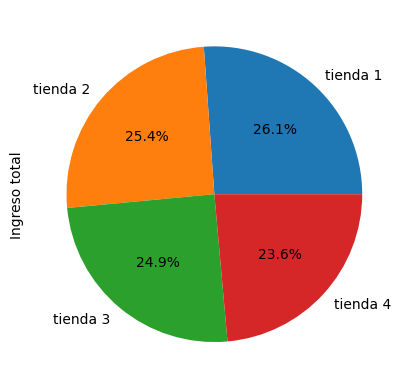

 donde la tienda tiene un total de: 4403619200.0 en ingresos, a continuación se muestra la tabla del recaudo de cada tienda.
          Ingreso total
Tienda                 
tienda 1   1.150880e+09
tienda 2   1.116344e+09
tienda 3   1.098020e+09
tienda 4   1.038376e+09
      
      None
      


In [18]:
print(f""" donde la tienda tiene un total de: {df_Ingresos["Ingreso total"].sum()} en ingresos, a continuación se muestra la tabla del recaudo de cada tienda.
{df_Ingresos}

      {display(grafico_ingresos.get_figure())}
      """)

##VENTAS POR CATEGORÍA


In [7]:
ventas_por_categorias = [] #lista donde se guardaran las ventas de cada tienda

#función que se encarga de obtener la cantidad de ventas de una lista
def obtener_ventas (df, numero_de_tienda):
  conteos = df['Categoría del Producto'].value_counts()
  return conteos.to_frame(name=f"Ventas por categoría de tienda {numero_de_tienda}")

#ciclo que recorre cada uno de los data frames
for n, tienda in enumerate(tiendas):
  resultado = obtener_ventas(tienda, n +1)
  ventas_por_categorias.append(resultado)

print(f"""
{ventas_por_categorias[0]}

      {ventas_por_categorias[1]}

      {ventas_por_categorias[2]}

      {ventas_por_categorias[3]}
      """)


                         Ventas por categoría de tienda 1
Categoría del Producto                                   
Muebles                                               465
Electrónicos                                          448
Juguetes                                              324
Electrodomésticos                                     312
Deportes y diversión                                  284
Instrumentos musicales                                182
Libros                                                173
Artículos para el hogar                               171

                               Ventas por categoría de tienda 2
Categoría del Producto                                   
Muebles                                               442
Electrónicos                                          422
Juguetes                                              313
Electrodomésticos                                     305
Deportes y diversión                                  275
Instru

##Productos más vendidos y menos vendidos

[Text(0, 0, 'Muebles'), Text(1, 0, 'Artículos para el hogar')]

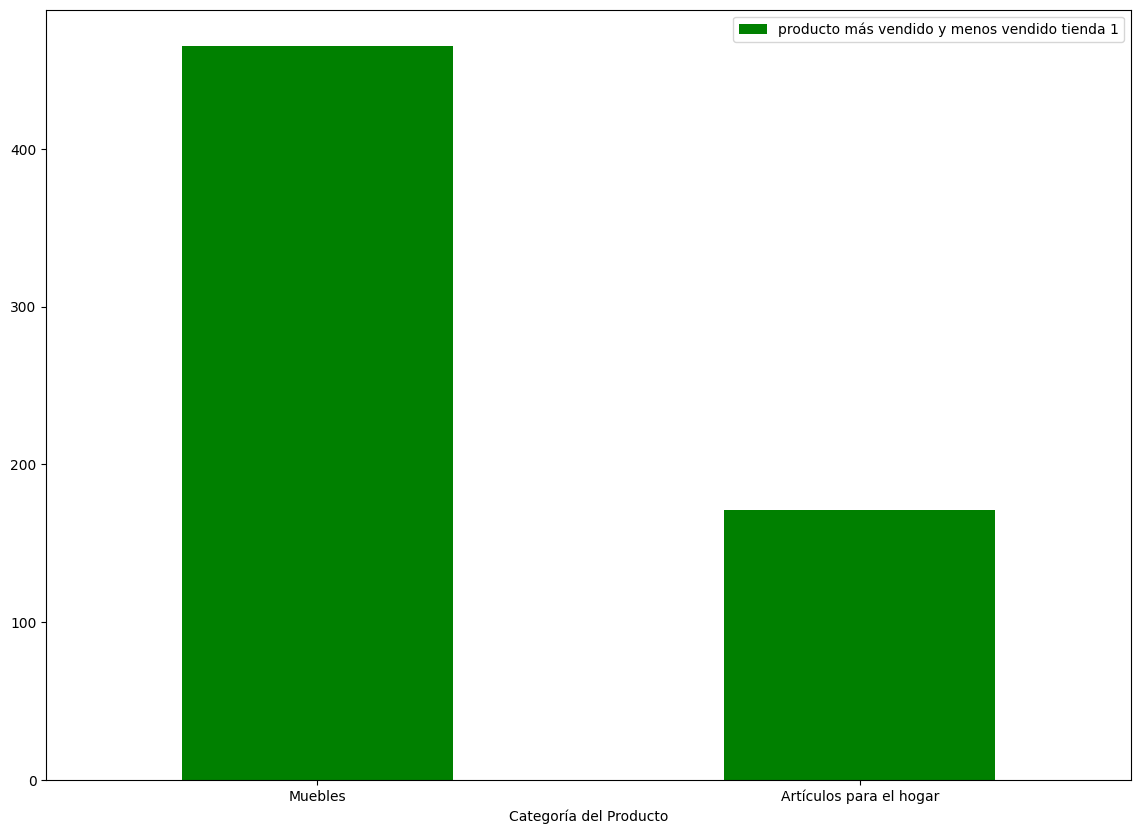

In [8]:
record_de_ventas = []
def obtener_masymenos_vendido(df_ventas_por_categoria, numero_de_tienda):
  # df_ventas_por_categoria ahora es el DataFrame con las ventas por categoría para una tienda específica.
  nombre_columna_ventas = f"Ventas por categoría de tienda {numero_de_tienda}"

  # Obtener los índices de la categoría con la venta máxima y mínima
  indice_maximo = df_ventas_por_categoria[nombre_columna_ventas].idxmax()
  indice_minimo = df_ventas_por_categoria[nombre_columna_ventas].idxmin()

  # Usar .loc con una lista para seleccionar las filas por sus índices (categorías)
  mas_vendido = df_ventas_por_categoria.loc[[indice_maximo]]
  menos_vendido = df_ventas_por_categoria.loc[[indice_minimo]]

  return pd.concat([mas_vendido, menos_vendido])

#ciclo for para guardar cada uno de los data frames del de más y menos vendidos.
for n, venta in enumerate(ventas_por_categorias):
  resultado_ventas = obtener_masymenos_vendido(venta, n+1)
  record_de_ventas.append(resultado_ventas.rename(columns={f'Ventas por categoría de tienda {n+1}': f'producto más vendido y menos vendido tienda {n+1}'}))


ax = record_de_ventas[0].plot(kind= 'bar', figsize=(14,10), color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


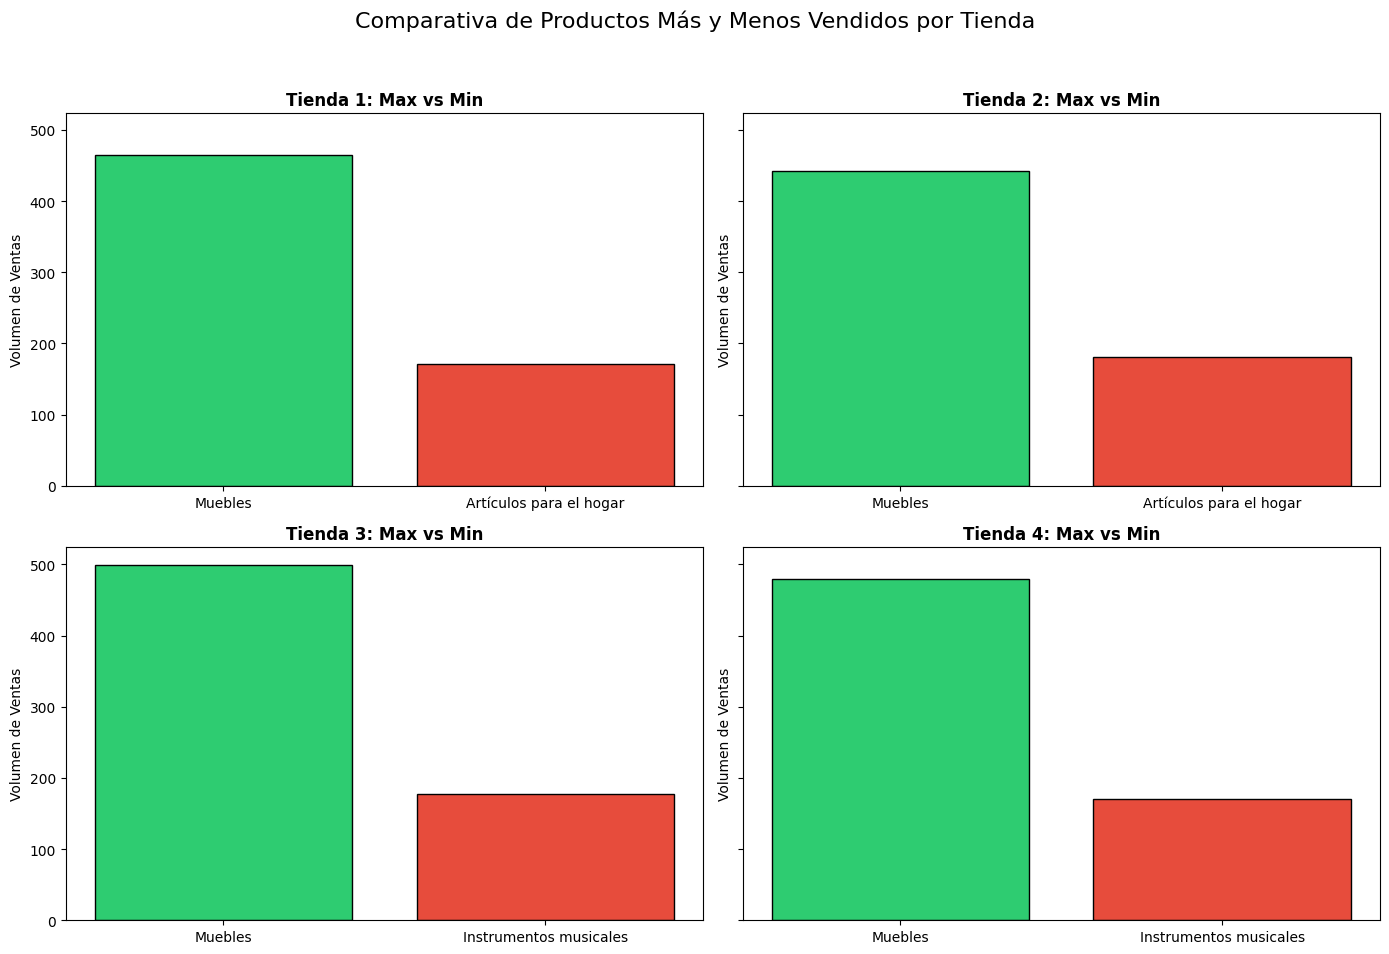

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10), sharey=True)
axes = axes.flatten()
for i, df in enumerate(record_de_ventas):
  col_ventas = df.columns[0]
  bars = axes[i].bar(df.index, df[col_ventas], color=['#2ecc71', '#e74c3c'], edgecolor='black')

  axes[i].set_title(f"Tienda {i+1}: Max vs Min", fontsize=12, fontweight='bold')
  axes[i].set_ylabel("Volumen de Ventas")

plt.suptitle("Comparativa de Productos Más y Menos Vendidos por Tienda", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##Valoración media por tienda

In [10]:
valoracion_por_tienda = []
def valoración_media(df_valoracion, numero_de_tienda):
  medias = df_valoracion['Calificación'].mean()
  return {'tienda' : f"Valoración media tienda {numero_de_tienda}", 'media' : medias}

for m, media in enumerate(tiendas):
  resultado = valoración_media(media, m+1)
  valoracion_por_tienda.append(resultado)

df_media = pd.DataFrame(valoracion_por_tienda).sort_values(by="media", ascending=False)
df_media

,tienda,media
2,Valoración media tienda 3,4.048326
1,Valoración media tienda 2,4.037304
3,Valoración media tienda 4,3.995759
0,Valoración media tienda 1,3.976685


##media de valor envio

<Axes: title={'center': 'Costo de Envío Promedio por Tienda'}, xlabel='costo promedio(COP)', ylabel='tiendas'>

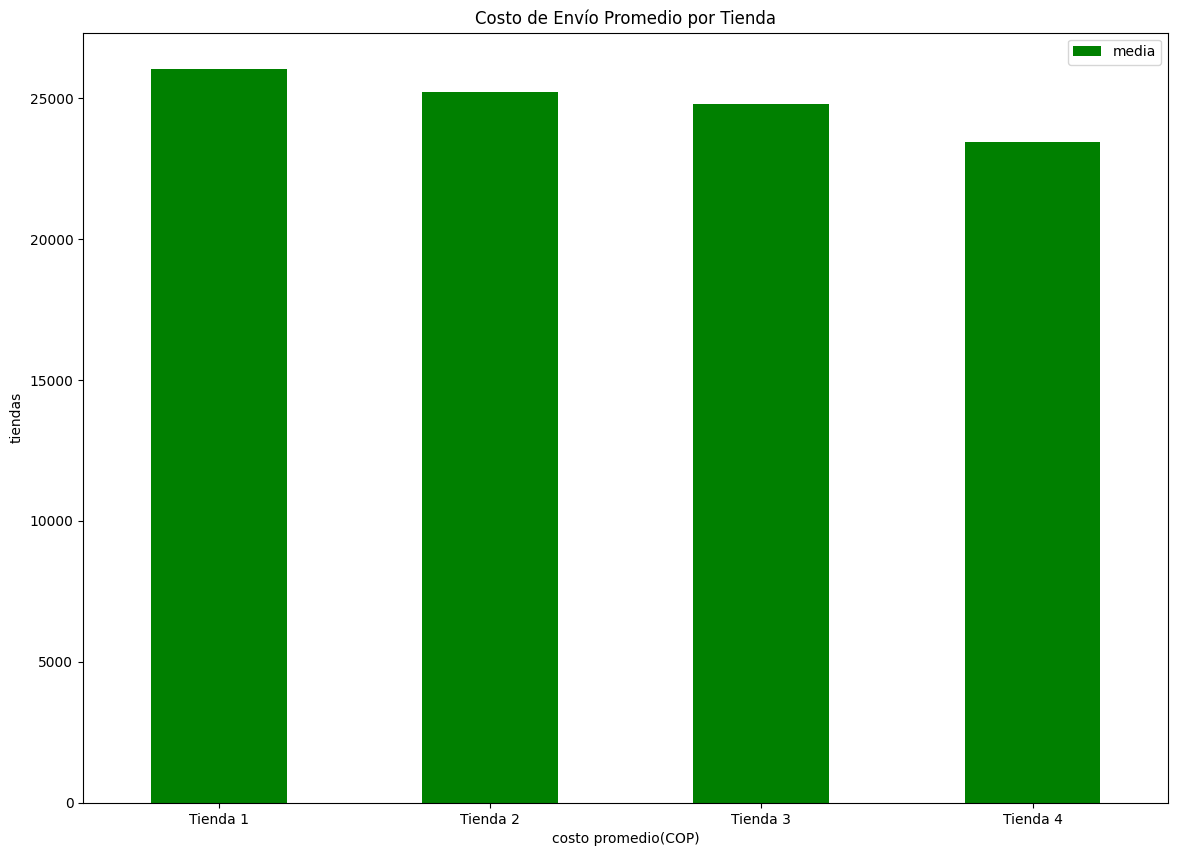

In [11]:
costo_por_envio = []
def valor_promedio_envio(df_costo_envio, numero_de_tienda):
  medias = df_costo_envio['Costo de envío'].mean()
  return {'Tienda' : f"Tienda {numero_de_tienda}", 'media' : medias}

for m, tienda in enumerate(tiendas):
  resultado = valor_promedio_envio(tienda, m+1)
  costo_por_envio.append(resultado)

df_envio = pd.DataFrame(costo_por_envio).sort_values(by="media", ascending=False)
df_envio.plot(x='Tienda',
              y='media', kind='bar',
              figsize=(14,10),
              color='green',
              title='Costo de Envío Promedio por Tienda',
              ylabel="tiendas",
              xlabel='costo promedio(COP)',
              rot = 0)


##¡Extra! Análisis del desempeño geográfico

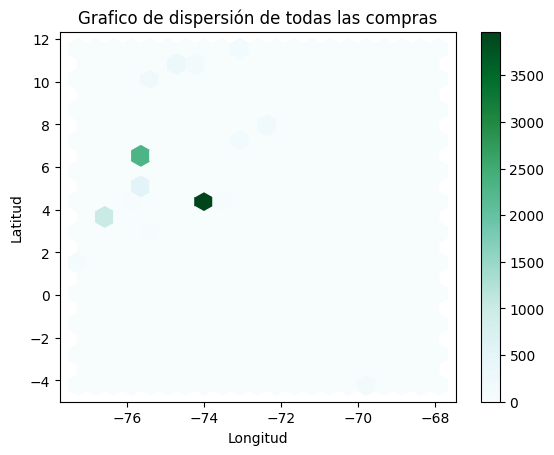

In [12]:
df1 = tienda1[['Latitud', 'Longitud']]
df2 = tienda2[['Latitud', 'Longitud']]
df3 = tienda3[['Latitud', 'Longitud']]
df4 = tienda4[['Latitud', 'Longitud']]

df_cordenadas = pd.concat([df1, df2, df3, df4], ignore_index=True)
ax = df_cordenadas.plot.hexbin(x="Longitud",
                               y= "Latitud",
                               title="Grafico de dispersión de todas las compras",
                               gridsize=20)



In [13]:
hb = ax.collections[0]

# 3. Obtener coordenadas de los centros (centros de los hexágonos)
coordenadas = hb.get_offsets()

# 4. Obtener los conteos (valores de densidad)
conteos = hb.get_array()

# Opcional: Crear un nuevo DataFrame con los resultados
df_resultados = pd.DataFrame(coordenadas, columns=['Longitud', 'Latitud'])
df_resultados['Cantidad Compras'] = conteos

# Filtrar solo hexágonos que tengan al menos 1 compra
df_final = df_resultados[df_resultados['Cantidad Compras'] > 0].sort_values(by='Cantidad Compras', ascending=False)
print(df_final.head(3))

      Longitud   Latitud  Cantidad Compras
90  -74.006087  4.380931            3962.0
292 -75.643598  6.529984            2314.0
268 -76.579319  3.664580            1007.0


#**INFORME FINAL**

Mediante la ciencia de datos, utilizando el lengauje de programación de Python se ha podido determinar el rendimiento de cada una de las tiendas del Sr Juan, donde se analizaron:

1.   Los ingresos totales de las tiendas.
2.   Las categorías de productos más y menos vendidas.
3.   Las calificaciones promedio de los clientes por tienda.
4.   Los productos más y menos vendidos.
5.   El coste de envío promedio para cada tienda.
6.   Desempeño gráfico

A continuación vamos a discutir cada uno de los puntos.












##**1.   Los ingresos totales de las tiendas.**


A continuación podemos observar los ingresos de cada una de las 4 tiendas, donde cada una mantiene un rango similar en porcentaje con respecto al ingreso total que fue de 4.403.619.200 COP, cada tienda superó los 1.000 millones de pesos colombianos

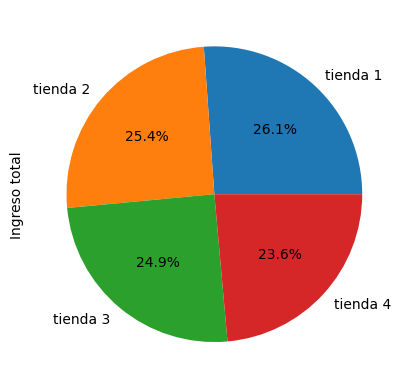

 donde la tienda tiene un total de: 4403619200.0 en ingresos, a continuación se muestra la tabla del recaudo de cada tienda.
          Ingreso total
Tienda                 
tienda 1   1.150880e+09
tienda 2   1.116344e+09
tienda 3   1.098020e+09
tienda 4   1.038376e+09
      
      None
      


In [ ]:
# @title
print(f""" donde la tienda tiene un total de: {df_Ingresos["Ingreso total"].sum()} en ingresos, a continuación se muestra la tabla del recaudo de cada tienda.
{df_Ingresos}

      {display(grafico_ingresos.get_figure())}
      """)

##**2.   Las categorías de productos más y menos vendidas.**
